# 1. Chain length distributions

What is covered in this notebook:

- Compare chain lengths **before alignment** vs. chain lengths **after alignment**

- Compare whole-dataset vs. light chains only vs. heavy chains only

- Compare percentage of residues cropped by FASTA alignment

---

Function used throughout this notebook are defined here:

In [3]:
import collections

import freesasa
import pandas as pd
import seaborn as sns
from IPython.display import Image

import utils

def nondash_counts(df: pd.DataFrame):
    return df.count(axis=1) - df.apply(lambda x: x.str.contains('-').sum(), axis=1)

### Both chains combined

In [14]:
fasta_aligned_df = pd.read_csv('../../data/csv/fasta_aho.csv', index_col=0)
fasta_unaligned_df = pd.read_csv('../../data/csv/fasta.csv', index_col=0)
aligned_lengths = nondash_counts(fasta_aligned_df)
unaligned_lengths = nondash_counts(fasta_unaligned_df)

# make seaborn plots nicer
sns.set(rc={'figure.figsize':(15, 3)})

#### After alignment

In [5]:
aligned_lengths.describe()

count    8492.000000
mean      114.812412
std         7.227352
min        49.000000
25%       108.000000
50%       113.000000
75%       120.000000
max       142.000000
dtype: float64

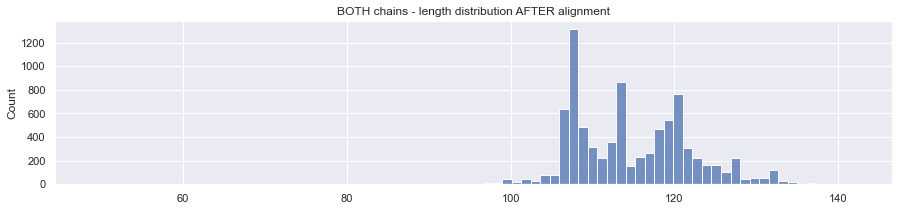

In [6]:
len_dist_aligned_plot = sns.histplot(data=aligned_lengths)
_ = len_dist_aligned_plot.set_title('BOTH chains - length distribution AFTER alignment')

In [7]:
total = len(aligned_lengths)
area1 = aligned_lengths[aligned_lengths.between(95, 135)].count()
area1_perc = area1 / total * 100
area1, area1_perc

(8460, 99.62317475270844)

--- 

For **both** chains, **after** alignment, the mean length was 114 residues, with standard deviation of ~7.

The shortest chain had 49 residues, the longest one 142.

There is one big visible cluster of lengths - **99.62%** of samples had their length between 95 and 135.

#### Before alignment

In [8]:
unaligned_lengths.describe()

count    8492.000000
mean      201.374588
std        38.117261
min        85.000000
25%       211.000000
50%       214.000000
75%       219.000000
max       523.000000
dtype: float64

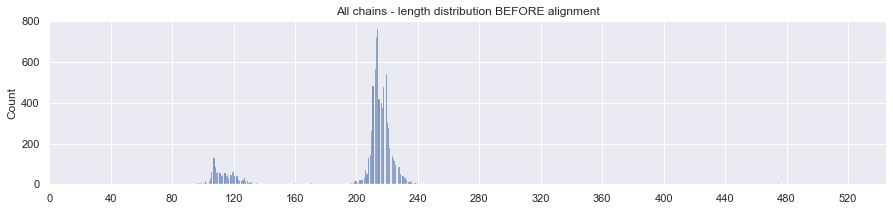

In [9]:
len_dist_unaligned_plot = sns.histplot(data=unaligned_lengths)
len_dist_unaligned_plot.set_xticks(range(0, max(unaligned_lengths), 40))
_ = len_dist_unaligned_plot.set_title('All chains - length distribution BEFORE alignment')

In [10]:
total = len(unaligned_lengths)
area1 = unaligned_lengths[unaligned_lengths.between(95, 135)].count()
area1_perc = area1 / total * 100

area2 = unaligned_lengths[unaligned_lengths.between(195, 240)].count()
area2_perc = area2 / total * 100

print(f"""Area1[95-135] - {area1} ({area1_perc:.2f}%)
Area2[195-240] - {area2} ({area2_perc:.2f}%)
Together: {area1 + area2} ({area1_perc + area2_perc:.2f}%)""")

Area1[95-135] - 1224 (14.41%)
Area2[195-240] - 7163 (84.35%)
Together: 8387 (98.76%)


--- 

For **both** chains combined, **before** alignment, the mean length was ~201, with standard deviation of ~37.

The shortest chain had 85 residues, the longest one 523.

We see there are two distinct clusters of chain lengths
1. between `95` and `135` (14.41%)
2. between `195` and `240` (84.35%)

Merged together, these contain **98.76%** of all samples.

____

#### BEFORE and AFTER combined

Show both **before** and **after** distributions in one plot:

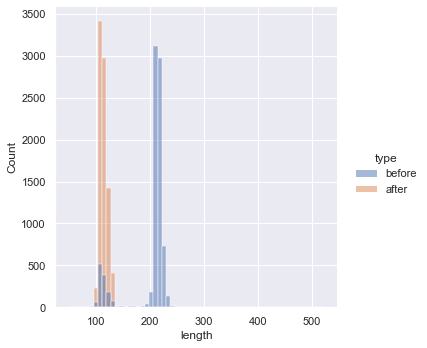

In [15]:
before = pd.DataFrame({'length': unaligned_lengths, 'type': 'before'})
after = pd.DataFrame({'length': aligned_lengths, 'type': 'after'})
together = pd.concat([before, after])
together.index = range(len(together))
sns.set(rc={'figure.figsize':(15, 3)})
before_after_distr_plot = sns.displot(together, x='length', hue='type')

#### Aminoacids cropped by FASTA alignment

AAs that do not correspond to variable region of the antibody \
will be omitted. 

Examples of such regions that will be removed from the sequence by renumbering:

**TODO** 

---

In [15]:
cropped_aa_number = unaligned_lengths - aligned_lengths
cropped_aa_number.describe()

count    8473.000000
mean       86.437389
std        37.126295
min         0.000000
25%        95.000000
50%       101.000000
75%       104.000000
max       414.000000
dtype: float64

<AxesSubplot:ylabel='Count'>

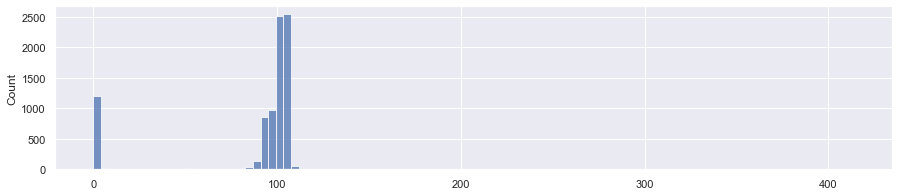

In [16]:
sns.histplot(data=cropped_aa_number, bins=100)

In [17]:
cropped_aa_percentage = cropped_aa_number / unaligned_lengths * 100
cropped_aa_percentage.describe()

count    8473.000000
mean       39.983055
std        16.598265
min         0.000000
25%        43.809524
50%        46.082949
75%        48.623853
max        79.158700
dtype: float64

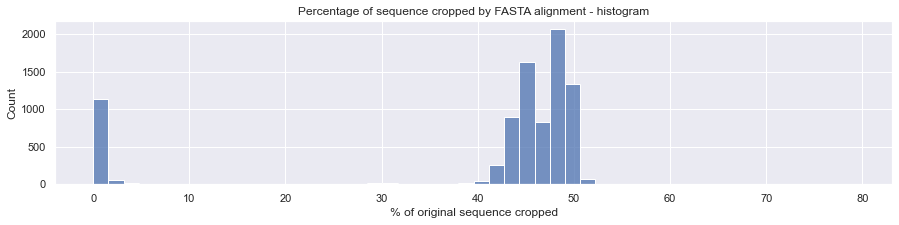

In [18]:
crop_percentage_plot = sns.histplot(data=cropped_aa_percentage, bins=50)
_=crop_percentage_plot.set_title('Percentage of sequence cropped by FASTA alignment - histogram')
_=crop_percentage_plot.set(xlabel='% of original sequence cropped')

Our dataset may be well divided into two groups

1. Smaller one - contains ~1000 sequences that are not shortened by alignment
2. Bigger one - contains ~7000 sequences - 40-50% of original chain content is removed by alignment

**TODO**
- is this worth further examination? 
- E.g. to check if those that are **not** shortened have high sequence identity
- or maybe they were submitted by diligent research group?

Now let us take a look at some structures that have 10-20% of original sequence cropped:


In [19]:
cap = cropped_aa_percentage
cap[(cap >= 10) & (cap <= 20)]

1CL7:H    11.111111
2AEP:H    16.083916
2AEP:L    16.279070
4HF5:H    15.032680
5V8L:L    10.204082
5V8M:L    10.204082
6UYN:H    18.243243
7CEB:H    18.367347
dtype: float64

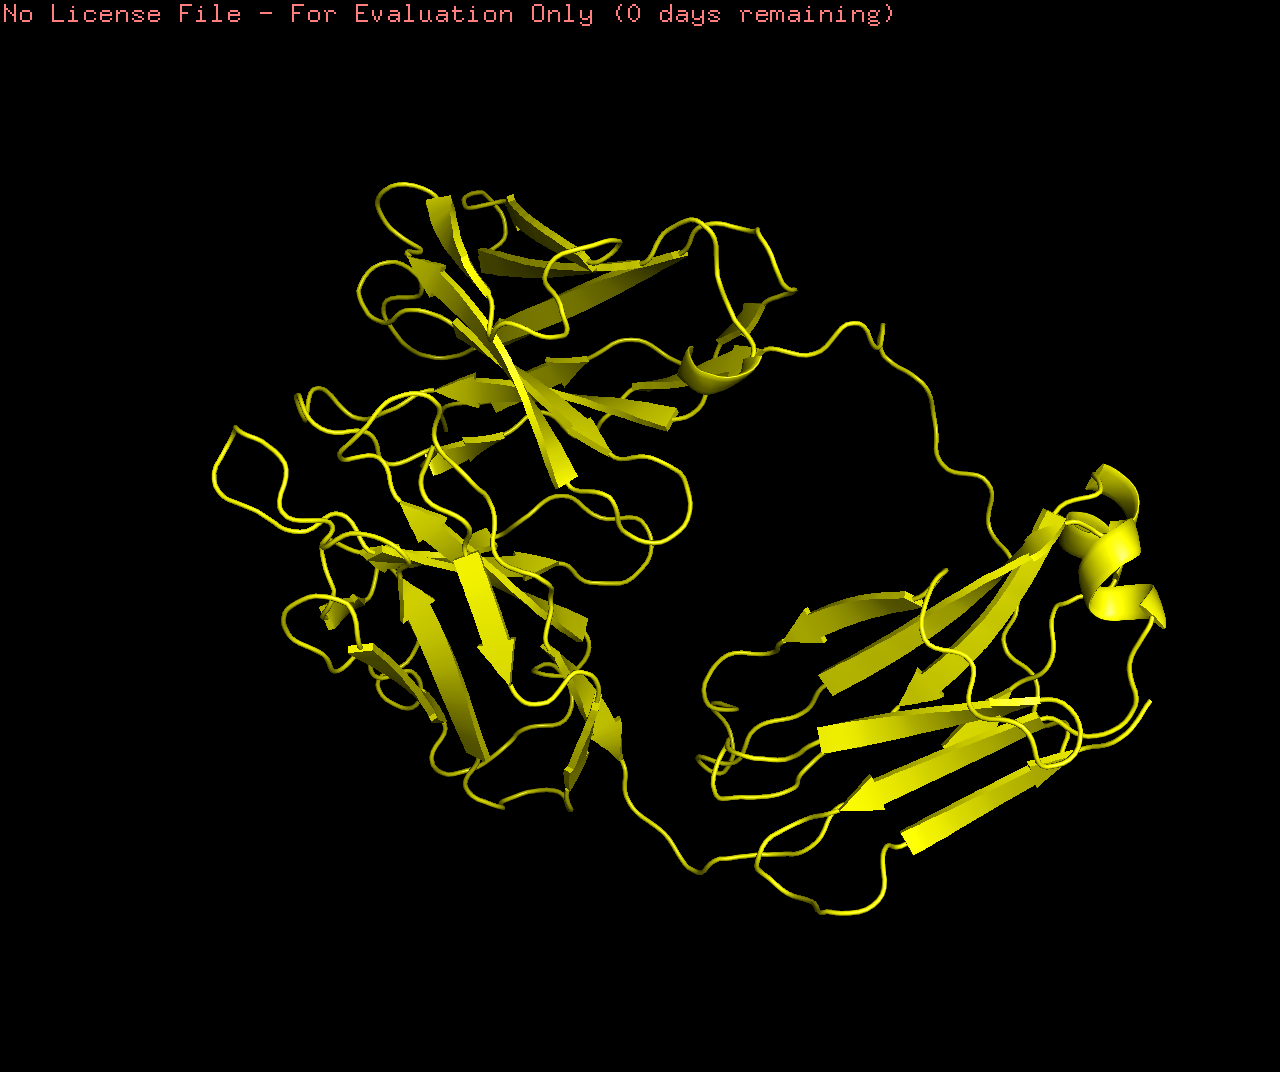

In [2]:
Image("../../data/png/1cl7.png")

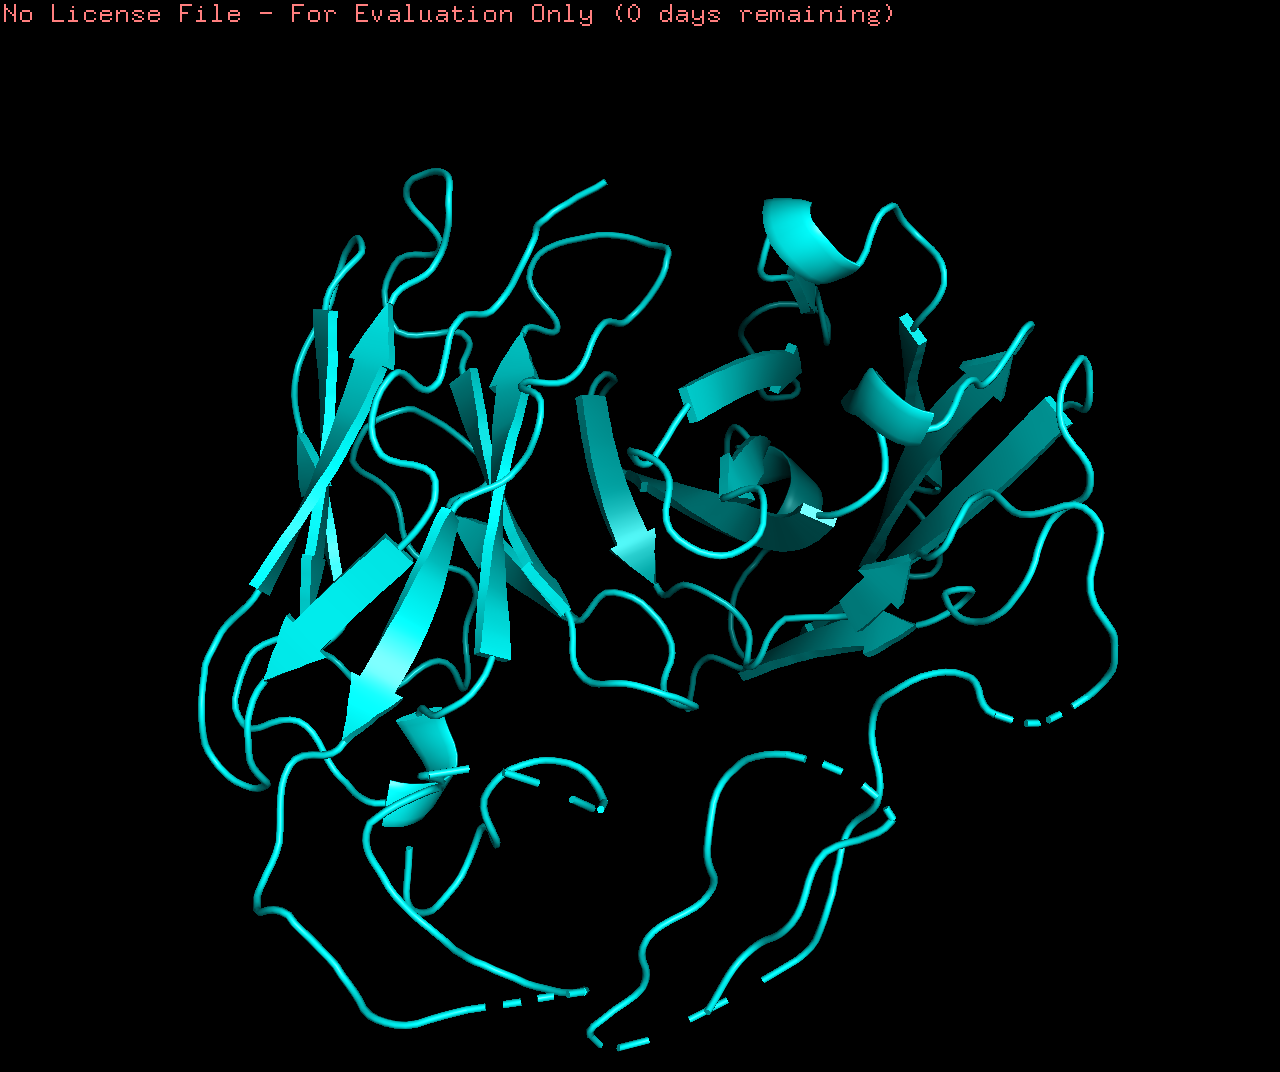

In [4]:
Image("../../data/png/2aep.png")

In [20]:
cap = cropped_aa_percentage
cap[(cap >= 70)]

1HZH:H    71.396396
1IGA:H    74.526316
1IGT:H    73.423423
1IGY:H    73.732719
1MCO:H    72.663551
1R70:H    73.809524
1ZVO:H    74.804688
2ESG:H    74.526316
2RCJ:L    79.158700
5D70:L    75.000000
5DK3:H    72.789116
6GFE:H    71.126761
7KHF:H    70.657277
dtype: float64

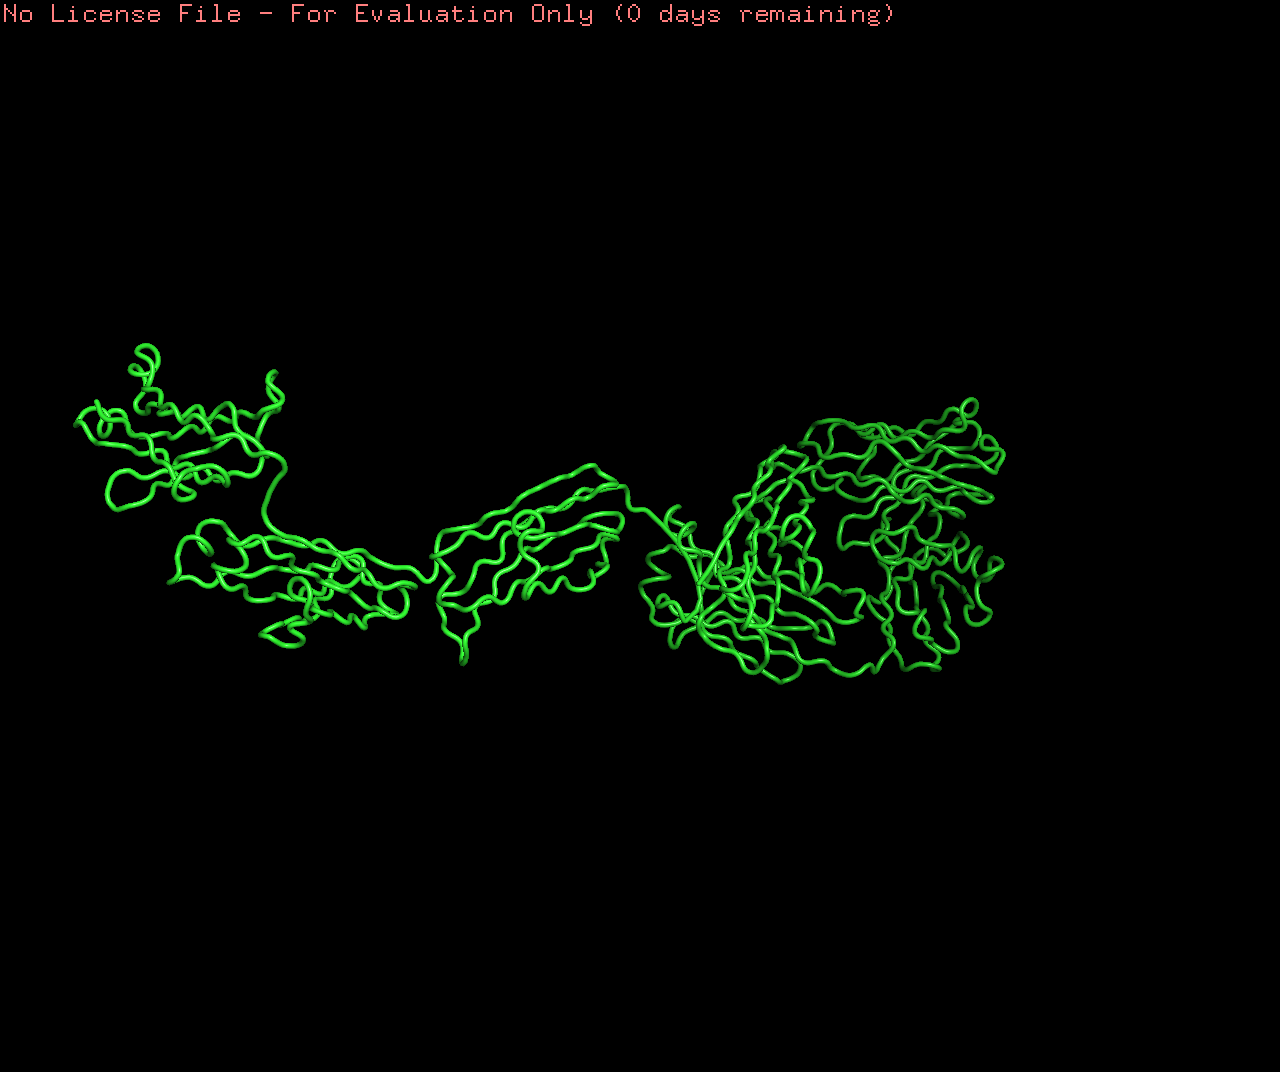

In [5]:
Image("../../data/png/2rcj.png")

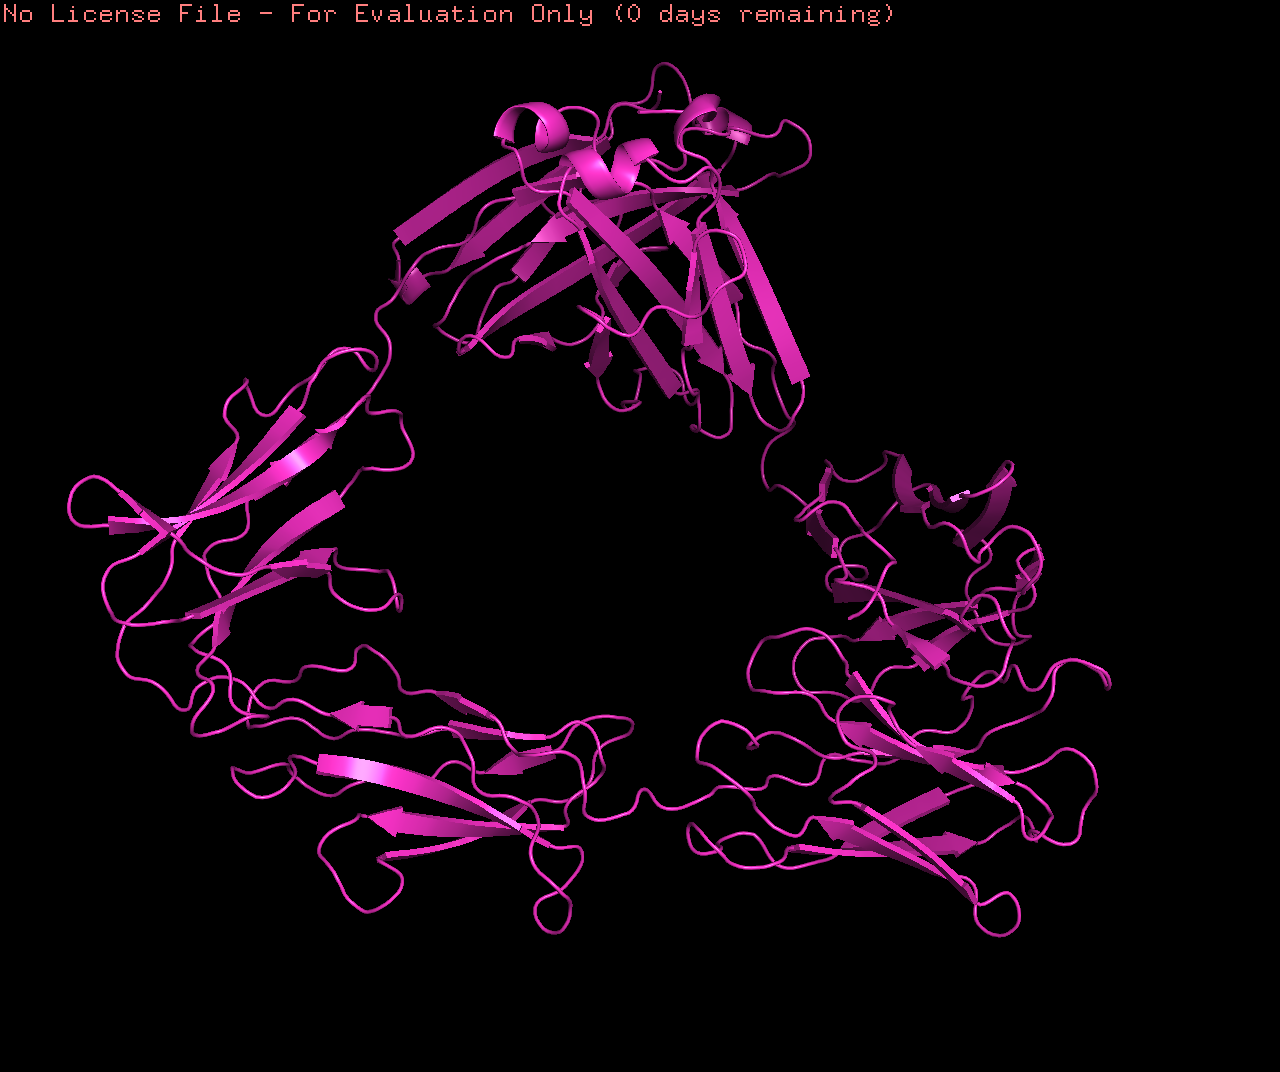

In [6]:
Image("../../data/png/7khf.png")

In [46]:
def get_structure_stats(structure_name, prt=False):
    structure_path = f'../../data/pdb/structure-renumbered-raw/{structure_name}.pdb'
    structure = freesasa.Structure(structure_path)
    result = freesasa.calc(structure)
    area_classes = freesasa.classifyResults(result, structure)
    for key in area_classes:
        if prt:
            print(f'{key}: {area_classes[key]:.2f} A2')
    Lperc = cropped_aa_percentage[structure_name.upper()+':L']
    Hperc = cropped_aa_percentage[structure_name.upper()+':H']
    if prt:
        print(f'total area: {result.totalArea():.2f} A2')
        print(f'Percentage L: {Lperc:.2f}% H: {Hperc:.2f}%')
    
    average_perc = (Lperc + Hperc) / 2
    return (result.totalArea(), average_perc)

/Users/benor/PycharmProjects/proto-moto/condaenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


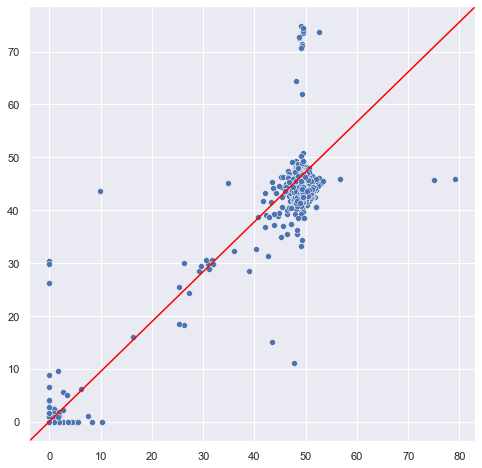

In [26]:
# scatterplot for crop percentages
cpa = cropped_aa_percentage
codes_counter = collections.Counter([c[:4] for c in cpa.index])
structure_codes = []
for key, count in codes_counter.items():
    if count == 2:
        structure_codes.append(key)

import seaborn as sns
sns.set(rc={'figure.figsize':(8, 8)})
x = [cpa[sc + ':L'] for sc in structure_codes]
y = [cpa[sc + ':H'] for sc in structure_codes]
crop_scatterplot = sns.scatterplot(x, y)
utils.draw_identity_line(crop_scatterplot)

means: 
chain
H    38.296544
L    41.669168
Name: percentage_crop, dtype: float64


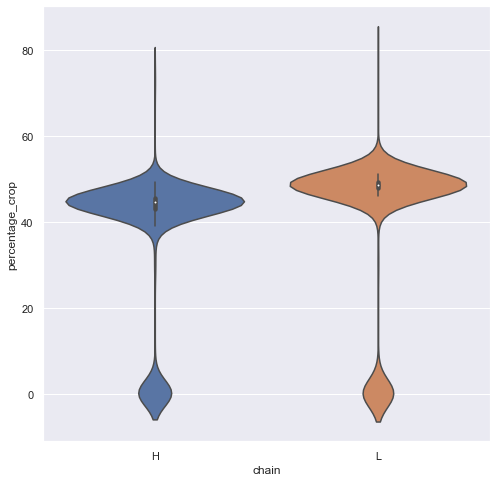

In [41]:
p = pd.DataFrame(cpa, columns=['percentage_crop'])
p['chain'] = p.index.map(lambda x: x[-1])
sns.violinplot(x='chain', y='percentage_crop', data=p)
print('means: \n', p.groupby('chain')['percentage_crop'].mean(), sep='')

In [47]:
structure_stats = [get_structure_stats(sc.lower(), prt=False) for sc in structure_codes]
structure_stats[:3]

[(20099.298290045463, 47.61703387321859),
 (19606.30846710918, 46.993790701196424),
 (19169.578153017046, 47.076638538897235)]

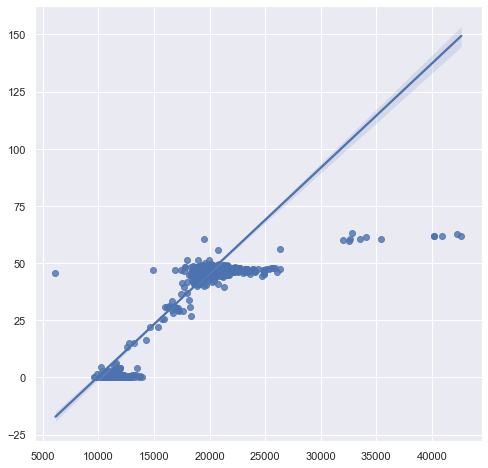

In [55]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8, 8)})
x, y = zip(*structure_stats)
import numpy as np
x = np.array(x)
y = np.array(y)
scatterplot = sns.regplot(x, y)
# utils.draw_identity_line(scatterplot)


In [42]:
get_structure_stats('7khf')

total area: 32547.88 A2
Polar: 12349.97 A2
Apolar: 20197.91 A2
Percentage L: 49.07% H: 70.66%


In [48]:
get_structure_stats('2aep')

total area: 14302.78 A2
Polar: 5438.75 A2
Apolar: 8864.03 A2
Percentage L: 16.28% H: 16.08%


### Light chain only

In [27]:
fasta_L_aligned_df = pd.read_csv('../../data/csv/fasta_aho_L.csv', index_col=0)
fasta_L_unaligned_df = pd.read_csv('../../data/csv/fasta_L.csv', index_col=0)
aligned_lengths = nondash_counts(fasta_L_aligned_df)
unaligned_lengths = nondash_counts(fasta_L_unaligned_df)

#### After alignment

In [17]:
aligned_lengths.describe()

count    4246.000000
mean      108.951013
std         3.182691
min        49.000000
25%       108.000000
50%       108.000000
75%       111.000000
max       119.000000
dtype: float64

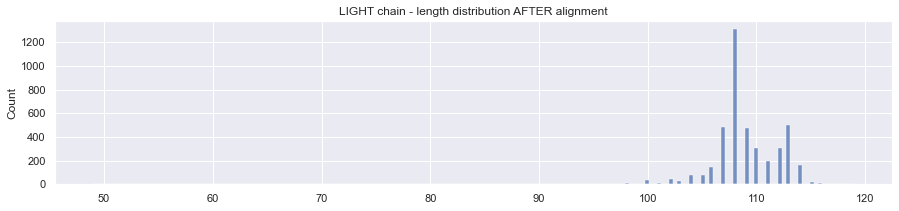

In [18]:
len_dist_L_aligned_plot = sns.histplot(data=aligned_lengths)
_ = len_dist_L_aligned_plot.set_title('LIGHT chain - length distribution AFTER alignment')

#### Before alignment

In [19]:
unaligned_lengths.describe()

count    4246.000000
mean      197.770372
std        37.671962
min        85.000000
25%       210.000000
50%       213.000000
75%       215.000000
max       523.000000
dtype: float64

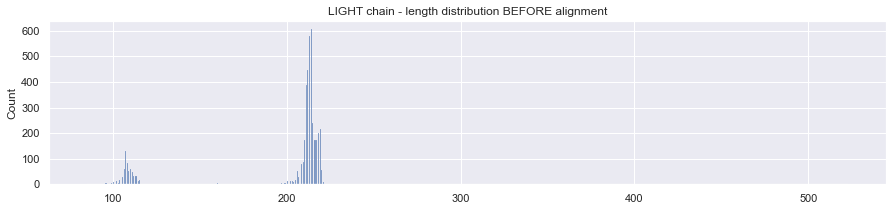

In [20]:
len_dist_L_unaligned_plot = sns.histplot(data=unaligned_lengths)
_ = len_dist_L_unaligned_plot.set_title('LIGHT chain - length distribution BEFORE alignment')

#### Aminoacids cropped by FASTA alignment

In [28]:
cropped_aa_number = unaligned_lengths - aligned_lengths
cropped_aa_percentage = cropped_aa_number / unaligned_lengths * 100
cropped_aa_percentage.describe()

count    4246.000000
mean       41.685008
std        17.152467
min         0.000000
25%        47.887324
50%        48.623853
75%        49.295775
max        79.158700
dtype: float64

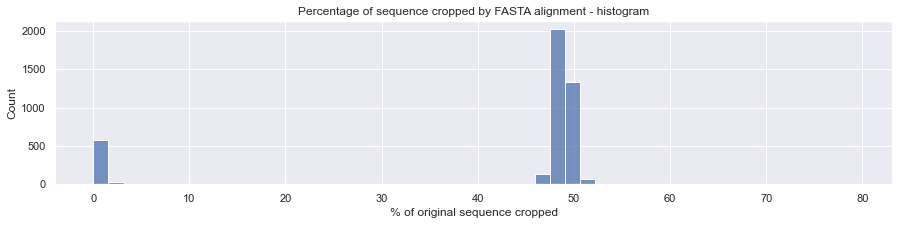

In [29]:
crop_percentage_plot = sns.histplot(data=cropped_aa_percentage, bins=50)
_=crop_percentage_plot.set_title('Percentage of sequence cropped by FASTA alignment - histogram')
_=crop_percentage_plot.set(xlabel='% of original sequence cropped')

Percentage cropped for light chains is very similar compared to the caste of both-chains dataset.

The only distinction is **crop percentage is slightly higher for the majority of sequences - ~50%, not 40-50%,** as it was
in the previous case. 

*(see the cluster on the right)*

---

### Heavy chain only

In [13]:
fasta_H_aligned_df = pd.read_csv('../../data/csv/fasta_aho_H.csv', index_col=0)
fasta_H_unaligned_df = pd.read_csv('../../data/csv/fasta_H.csv', index_col=0)
aligned_lengths = nondash_counts(fasta_H_aligned_df)
unaligned_lengths = nondash_counts(fasta_H_unaligned_df)

#### After alignment

In [22]:
aligned_lengths.describe()

count    4246.000000
mean      120.673811
std         5.062000
min        92.000000
25%       118.000000
50%       120.000000
75%       123.000000
max       142.000000
dtype: float64

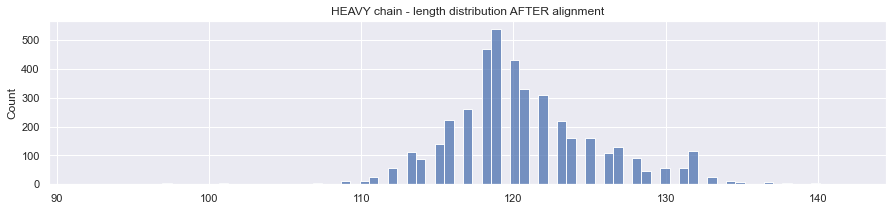

In [23]:
len_dist_H_aligned_plot = sns.histplot(data=aligned_lengths)
_ = len_dist_H_aligned_plot.set_title('HEAVY chain - length distribution AFTER alignment')

#### Before alignment

In [24]:
unaligned_lengths.describe()

count    4246.000000
mean      204.978804
std        38.223421
min        98.000000
25%       212.000000
50%       218.000000
75%       221.000000
max       512.000000
dtype: float64

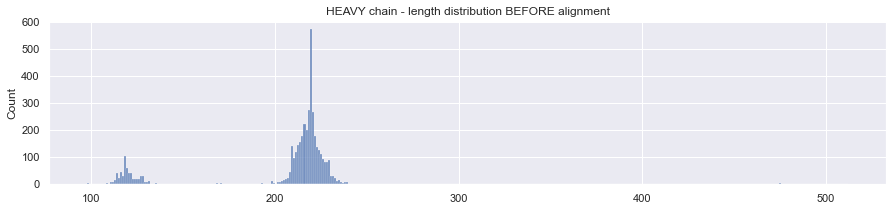

In [25]:
len_dist_H_unaligned_plot = sns.histplot(data=unaligned_lengths)
_ = len_dist_H_unaligned_plot.set_title('HEAVY chain - length distribution BEFORE alignment')

#### Aminoacids cropped by FASTA alignment

In [12]:
cropped_aa_number = unaligned_lengths - aligned_lengths
cropped_aa_percentage = cropped_aa_number / unaligned_lengths * 100
cropped_aa_percentage.describe()

count    8473.000000
mean       39.983055
std        16.598265
min         0.000000
25%        43.809524
50%        46.082949
75%        48.623853
max        79.158700
dtype: float64

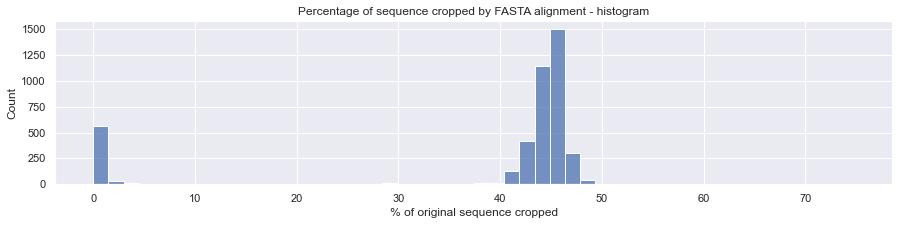

In [5]:
crop_percentage_plot = sns.histplot(data=cropped_aa_percentage, bins=50)
_=crop_percentage_plot.set_title('Percentage of sequence cropped by FASTA alignment - histogram')
_=crop_percentage_plot.set(xlabel='% of original sequence cropped')

Percentage cropped for heavy chains is mostly around ~45%.

*(see the cluster on the right)*

To sum it up, **for the heavy chains there is about 5% smaller alignment crop percentage compared to the light chains**.

---

Now let us take a look at some structures that have 10-20% of original sequence cropped:


### Ideas (TODO)

These are not strictly related to the length distributions, but I came upon those while looking at the data \
being used for the length distribution analysis, so I put them to this place for now.

Look at the dataframe view below, it is worth considering further?:

- examine the variance of aligned SASA values for positions that have very high residue identity? (all AAs on that position
are the same or similar by their chemical structure?)
- examine the variance of aligned SASA values for very rare positions, eg 3A, 4A... If the variance is low (I do not know yet), due to the whole sequences being similar? 
- compare SASA distribution of those positions where TOP aminoacid is some particular one **versus** those that have gap. Firstly combine all, then cherrypick some particular columns that may be interesting? Possible tools: violin plots, KL-divergence, Z-test... 
- examine correlation between sequence identity and average relative SASA per sample

In [34]:
fasta_aligned_df.describe()

,1,2,3,3A,4,4A,5,6,7,8,...,140,141,142,143,144,145,146,147,148,149
count,8492,8492,8492,8492,8492,8492,8492,8492,8492,8492,...,8492,8492,8492,8492,8492,8492,8492,8492,8492,8492
unique,18,18,20,2,10,2,16,11,17,12,...,7,16,5,5,17,6,15,14,19,18
top,D,V,Q,-,L,-,T,Q,S,G,...,-,-,-,-,-,-,-,-,-,-
freq,2375,4027,4417,8491,6155,8489,4031,5988,6840,4201,...,4253,4254,4253,4253,4259,4262,4284,4309,4396,4698
